In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
sns.set()
from matplotlib import rcParams

In [5]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving Weather Data.csv to Weather Data (1).csv


In [6]:
data = pd.read_csv(io.BytesIO(uploaded['Weather Data.csv'])) 
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1093 non-null   float64
 1   TM      1093 non-null   float64
 2   Tm      1093 non-null   float64
 3   SLP     1093 non-null   float64
 4   H       1093 non-null   float64
 5   VV      1093 non-null   float64
 6   V       1093 non-null   float64
 7   VM      1093 non-null   float64
 8   PM 2.5  1092 non-null   float64
dtypes: float64(9)
memory usage: 77.0 KB


In [8]:
data.fillna(method='ffill', inplace = True)

In [9]:

from sklearn.model_selection import train_test_split

X = data[['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']]
y = data['PM 2.5']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.10, random_state = 42)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam


In [11]:
model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')


In [12]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_val,y_val),
          batch_size=128,epochs=400)


Epoch 1/400
8/8 [==============================] - 1s 63ms/step - loss: 11250.3517 - val_loss: 9019.7725
Epoch 2/400
8/8 [==============================] - 0s 7ms/step - loss: 8071.4458 - val_loss: 7302.8755
Epoch 3/400
8/8 [==============================] - 0s 7ms/step - loss: 7073.2475 - val_loss: 7379.0254
Epoch 4/400
8/8 [==============================] - 0s 6ms/step - loss: 7084.9155 - val_loss: 7343.1807
Epoch 5/400
8/8 [==============================] - 0s 25ms/step - loss: 6873.3078 - val_loss: 7275.3022
Epoch 6/400
8/8 [==============================] - 0s 7ms/step - loss: 6903.0472 - val_loss: 7195.1226
Epoch 7/400
8/8 [==============================] - 0s 8ms/step - loss: 6795.4794 - val_loss: 7168.0942
Epoch 8/400
8/8 [==============================] - 0s 8ms/step - loss: 6919.3185 - val_loss: 7156.8027
Epoch 9/400
8/8 [==============================] - 0s 7ms/step - loss: 6794.9451 - val_loss: 7116.0635
Epoch 10/400
8/8 [==============================] - 0s 8ms/step - loss

In [13]:
y_pred = model.predict(X_val)

MAE: 36.63723612236254
MSE: 2723.9109367076812
RMSE: 52.19110016763089
VarScore: 0.6361123658965039


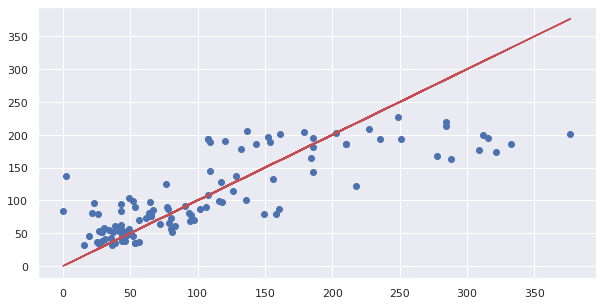

In [14]:
from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_val, y_pred))  
print('MSE:', metrics.mean_squared_error(y_val, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_val,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_val,y_pred)
# Perfect predictions
plt.plot(y_val,y_val,'r')

In [15]:
y = np.array(y_val)
y_p = np.array(y_pred).flatten()
df = pd.DataFrame({"Test Data": y, "Predicted Data": y_p})
df.head(100)

,Test Data,Predicted Data
0,33.791667,54.715805
1,30.333333,57.571880
2,97.291667,70.091835
3,26.583333,32.927692
4,284.795833,219.760986
...,...,...
95,154.037500,189.016785
96,82.833333,60.685047
97,93.500000,81.172127
98,120.208333,189.856125
